<a href="https://colab.research.google.com/github/dinaomidvartehrani/Applied-AI-/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Data Preprocessing
data = pd.read_csv('adult.csv')

# Handling missing values
data = data.dropna()

# Encoding categorical variables
data = pd.get_dummies(data)

# Splitting into features and target variable
X = data.drop('income_<=50K', axis=1)
y = data['income_<=50K']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Model Architecture
# The input_shape is set to (X_train.shape[1],), which corresponds to the number of features.
# The first dense layer has 64 neurons and uses the ReLU (Rectified Linear Unit)
# activation function. It introduces non-linearity into the neural network,
#  allowing it to learn complex patterns in the data.
# The sigmoid activation function squashes the output between 0 and 1, making it
#  suitable for binary classification problems. The output value represents the
#   probability of the input belonging to the positive class (income >$50,000).
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Step 4: Model Training
# We use 'adam' optimizer , which is a popular optimization algorithm known for
# its efficiency and adaptive learning rate. Also we use 'binary_crossentropy' as
# the loss function. It is suitable for binary classification tasks.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=10, batch_size=32)
# Store accuracy values for each epoch
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 5: Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)

Epoch 1/10
814/814 [==============================] - 3s 3ms/step - loss: 0.0490 - accuracy: 0.9831 - val_loss: 0.0045 - val_accuracy: 0.9983
Epoch 2/10
814/814 [==============================] - 3s 3ms/step - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.0083 - val_accuracy: 0.9988
Epoch 3/10
814/814 [==============================] - 3s 4ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0051 - val_accuracy: 0.9991
Epoch 4/10
814/814 [==============================] - 3s 4ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.0019 - val_accuracy: 0.9994
Epoch 5/10
814/814 [==============================] - 5s 6ms/step - loss: 3.3675e-05 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 0.9994
Epoch 6/10
814/814 [==============================] - 5s 6ms/step - loss: 1.3033e-05 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9995
Epoch 7/10
814/814 [==============================] - 3s 3ms/step - loss: 6.1606e-06 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 0

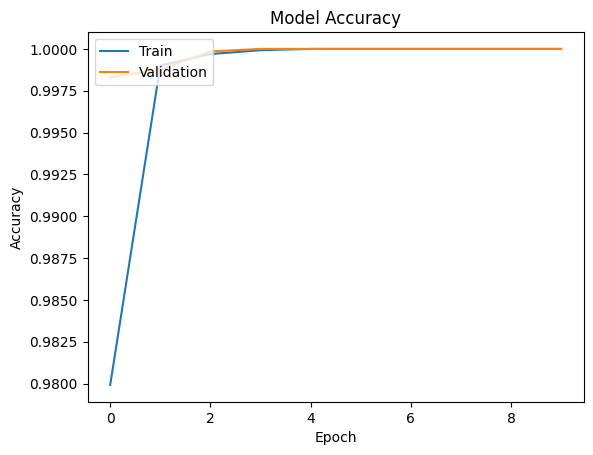

In [ ]:
# Plotting accuracy progress during training
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Epoch 1/10 | Train Loss: 0.6449 | Train Acc: 0.6025 | Val Acc: 0.7400
Epoch 2/10 | Train Loss: 0.4981 | Train Acc: 0.8350 | Val Acc: 0.8350
Epoch 3/10 | Train Loss: 0.3692 | Train Acc: 0.8638 | Val Acc: 0.8650
Epoch 4/10 | Train Loss: 0.3117 | Train Acc: 0.8825 | Val Acc: 0.8750
Epoch 5/10 | Train Loss: 0.2948 | Train Acc: 0.8800 | Val Acc: 0.8900
Epoch 6/10 | Train Loss: 0.2804 | Train Acc: 0.8962 | Val Acc: 0.8800
Epoch 7/10 | Train Loss: 0.2710 | Train Acc: 0.8950 | Val Acc: 0.8850
Epoch 8/10 | Train Loss: 0.2596 | Train Acc: 0.9038 | Val Acc: 0.8850
Epoch 9/10 | Train Loss: 0.2498 | Train Acc: 0.9025 | Val Acc: 0.8700
Epoch 10/10 | Train Loss: 0.2430 | Train Acc: 0.9012 | Val Acc: 0.8750


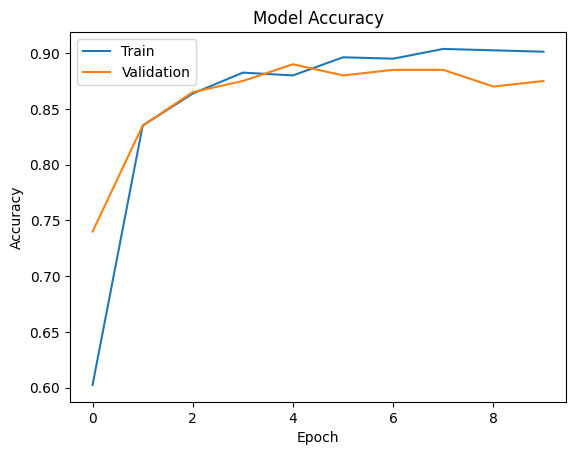

Test Accuracy: 0.875


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Create a simple DNN model
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(20, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Generate dummy data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

# Create DataLoader for easier batch processing
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize the model and loss function
model = DNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_acc_history = []
val_acc_history = []

for epoch in range(num_epochs):
    train_loss = 0.0
    train_correct = 0

    model.train()  # Set the model to training mode

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        train_correct += (predicted == labels).sum().item()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    train_accuracy = train_correct / len(train_loader.dataset)
    train_acc_history.append(train_accuracy)

    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():
        outputs = model(X_test)
        _, predicted = torch.max(outputs, 1)
        val_correct = (predicted == y_test).sum().item()
        val_accuracy = val_correct / len(y_test)
        val_acc_history.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_accuracy:.4f} | Val Acc: {val_accuracy:.4f}")

# Plotting accuracy progress during training
plt.plot(train_acc_history)
plt.plot(val_acc_history)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on test data
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    test_correct = (predicted == y_test).sum().item()
    test_accuracy = test_correct / len(y_test)
    print('Test Accuracy:', test_accuracy)

In [ ]:
import plotly.graph_objects as go

# Sample data
train_loss = [0.5, 0.4, 0.3, 0.2, 0.1]
test_loss = [0.6, 0.5, 0.4, 0.3, 0.2]
epochs = [1, 2, 3, 4, 5]

# Create figure and add lines
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines', name='Train Loss'))
fig.add_trace(go.Scatter(x=epochs, y=test_loss, mode='lines', name='Test Loss'))

# Update layout
fig.update_layout(title='Train and Test Loss Progress',
                  xaxis_title='Epoch',
                  yaxis_title='Loss',
                  legend_title='Loss Type')

# Show the plot
fig.show()

In [4]:
import plotly.graph_objects as go

# Sample data
train_loss = [0.7237, 0.3612, 0.3292, 0.3195, 0.3155]
test_loss = [0.3546, 0.3238, 0.3238, 0.3171, 0.3155]
epochs = [0, 2000, 4000, 6000, 8000]

# Create figure and add lines
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines', name='Train Loss'))
fig.add_trace(go.Scatter(x=epochs, y=test_loss, mode='lines', name='Test Loss'))

# Update layout
fig.update_layout(title='Train and Test Loss Progress',
                  xaxis_title='Epoch',
                  yaxis_title='Loss',
                  legend_title='Loss Type')

# Show the plot
fig.show()